In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

### a) Generate N = 10000 random numbers from [0, 1] and then obtain their labels: y i = 1 + x i , i = 1, 2, . . . , N

In [191]:
m = 10000
m_test = 2000
np.random.seed(42)

X = np.random.random(m).reshape(m, 1)
Y = np.sqrt(1+X)

X_test = np.random.random(m_test).reshape(m_test, 1)
Y_test = np.sqrt(1+X_test)

print(X.shape)
print(X[:5])
print(Y.shape)
print(Y[:5])

print(X_test.shape)
print(X_test[:5])
print(Y_test.shape)
print(Y_test[:5])

(10000, 1)
[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
(10000, 1)
[[1.17240783]
 [1.39667974]
 [1.31605241]
 [1.26438067]
 [1.07518307]]
(2000, 1)
[[0.37364082]
 [0.3329121 ]
 [0.17615391]
 [0.60726667]
 [0.47662416]]
(2000, 1)
[[1.17202424]
 [1.15451812]
 [1.0845063 ]
 [1.26778021]
 [1.21516425]]


### b) Do linear regression on your generated data using the closed form solution.

In [192]:
x_matrix = np.insert(X, 0, 1, axis=1)
print(x_matrix.shape)
print(x_matrix[:5])

(10000, 2)
[[1.         0.37454012]
 [1.         0.95071431]
 [1.         0.73199394]
 [1.         0.59865848]
 [1.         0.15601864]]


In [193]:
# Normal Equation train data
w_normal = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(Y)
w_normal

array([[1.01295066],
       [0.41208659]])

In [194]:
# train data estimate
yHat_normal = x_matrix.dot(w_normal) 

In [195]:
# test data estimate
x_matrix_test = np.insert(X_test, 0, 1, axis=1)
yHat_normal_test = x_matrix_test.dot(w_normal) 

In [220]:
print("train MSE: {} %".format(np.mean((yHat_normal - Y)**2)))
print("test MSE: {} %".format(np.mean((yHat_normal_test - Y_test)**2)))

train MSE: 2.757484921741974e-05 %
test MSE: 2.7941852905524038e-05 %


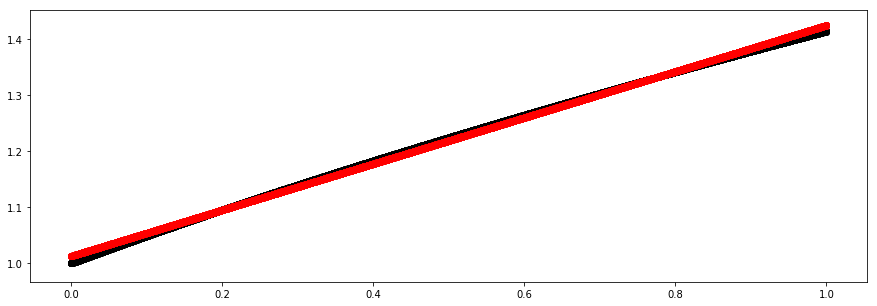

In [197]:
# train plot
plt.figure(figsize=(15,5))
plt.scatter(X, Y, c='k')
plt.scatter(X, yHat_normal, c='r')
plt.show()

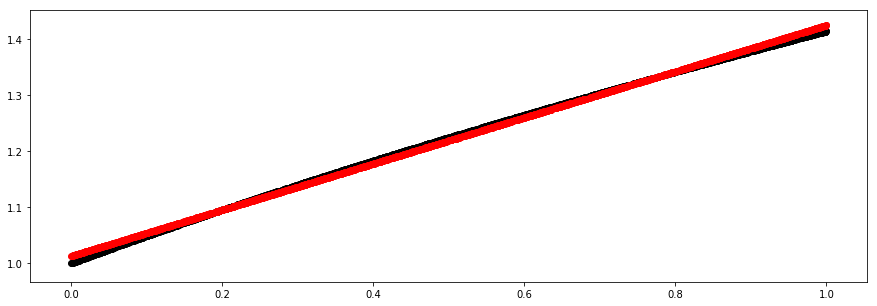

In [198]:
# test plot
plt.figure(figsize=(15,5))
plt.scatter(X_test, Y_test, c='k')
plt.scatter(X_test, yHat_normal_test, c='r')
plt.show()

### c) Do linear regression on your generated data using the library sklearn.

In [221]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)
yHat_sklrn = lr.predict(X)
yHat_sklrn_test = lr.predict(X_test)
print("train MSE: {} %".format(np.mean((yHat_sklrn - Y)**2)))
print("test MSE: {} %".format(np.mean((yHat_sklrn_test - Y_test)**2)))

train MSE: 2.757484921741974e-05 %
test MSE: 2.7941852905524187e-05 %


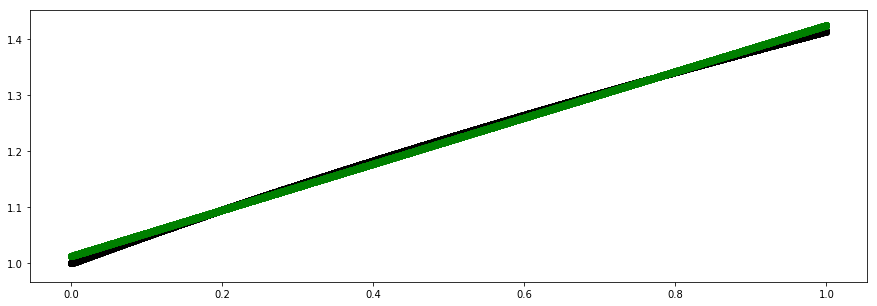

In [200]:
plt.figure(figsize=(15,5))
plt.scatter(X, Y, color = "k")
plt.scatter(X, yHat_sklrn, color = "g")
plt.show()

### d) Do linear regression on your generated data implementing the gradient descent algorithm by yourself.

In [201]:
def feedforward(w, b, X, Y):
    m = X.shape[0]
    # element-wise multiplication
    # X,Y are (m,1) vectors
    Z = w*X + b
    cost = 1/(2*m) * (Z-Y).T.dot(Z-Y)
    
    dw = 1/m * X.T.dot(Z-Y)
    db = 1/m * np.sum(Z-Y)
    
    return dw, db, cost

In [202]:
# test
feedforward(0, 0, X, Y)

(array([[-0.63527715]]), -1.216587184660105, array([[0.74707978]]))

In [205]:
def gradient_decent(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = feedforward(w, b, X, Y)
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [206]:
# init with 0s
w = 0
b = 0

In [207]:
params, grads, costs = gradient_decent(w, b, X, Y, 1000, 0.01, True)

Cost after iteration 0: 0.747080
Cost after iteration 100: 0.059321
Cost after iteration 200: 0.004971
Cost after iteration 300: 0.000646
Cost after iteration 400: 0.000274
Cost after iteration 500: 0.000219
Cost after iteration 600: 0.000192
Cost after iteration 700: 0.000170
Cost after iteration 800: 0.000151
Cost after iteration 900: 0.000134


In [208]:
def predict(params, X):
    Y_pred = params["w"]*X + params["b"]
    return Y_pred

In [209]:
# just testing
predict(params, np.array([0.4, 0.9]))

array([[1.171324 , 1.4024269]])

In [210]:
yHat_gd = predict(params, X)
yHat_gd_test = predict(params, X_test)

In [222]:
print("train MSE: {} %".format(np.mean((yHat_gd - Y)**2)))
print("test MSE: {} %".format(np.mean((yHat_gd_test - Y_test)**2)))

train MSE: 0.00023840406512280472 %
test MSE: 1.1696421546130231 %


In [227]:
learning_rates = [0.9, 0.5, 0.2, 0.1, 0.01]
x_train = X[:9000]
y_train = Y[:9000]
x_valid = X[9000:]
y_valid = Y[9000:]

for i in learning_rates:
    print ("learning rate is: " + str(i))
    params, grads, costs = gradient_decent(w, b, x_train, y_train, 1000, i, True)
    yHat_gd_test = predict(params, x_valid)
    print("validation MSE: {} %".format(np.mean((yHat_gd_test - y_valid)**2)))
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: 0.9
Cost after iteration 0: 0.746933
Cost after iteration 100: 0.000014
Cost after iteration 200: 0.000014
Cost after iteration 300: 0.000014
Cost after iteration 400: 0.000014
Cost after iteration 500: 0.000014
Cost after iteration 600: 0.000014
Cost after iteration 700: 0.000014
Cost after iteration 800: 0.000014
Cost after iteration 900: 0.000014
validation MSE: 2.693132285962925e-05 %

-------------------------------------------------------

learning rate is: 0.5
Cost after iteration 0: 0.746933
Cost after iteration 100: 0.000014
Cost after iteration 200: 0.000014
Cost after iteration 300: 0.000014
Cost after iteration 400: 0.000014
Cost after iteration 500: 0.000014
Cost after iteration 600: 0.000014
Cost after iteration 700: 0.000014
Cost after iteration 800: 0.000014
Cost after iteration 900: 0.000014
validation MSE: 2.6931322859629314e-05 %

-------------------------------------------------------

learning rate is: 0.2
Cost after iteration 0: 0.746933
Cost aft

In [229]:
# So from above the we can conclude yjat lr=0.9 has the lowest valid MSE.

params, grads, costs = gradient_decent(w, b, X, Y, 1000, 0.9, True)
yHat_gd = predict(params, X)
yHat_gd_test = predict(params, X_test)

print("train MSE: {} %".format(np.mean((yHat_gd - Y)**2)))
print("test MSE: {} %".format(np.mean((yHat_gd_test - Y_test)**2)))

Cost after iteration 0: 0.747080
Cost after iteration 100: 0.000014
Cost after iteration 200: 0.000014
Cost after iteration 300: 0.000014
Cost after iteration 400: 0.000014
Cost after iteration 500: 0.000014
Cost after iteration 600: 0.000014
Cost after iteration 700: 0.000014
Cost after iteration 800: 0.000014
Cost after iteration 900: 0.000014
train MSE: 2.757484921741974e-05 %
test MSE: 2.794185290552416e-05 %


### f) Sketch the graphs of all approximations on one graph.

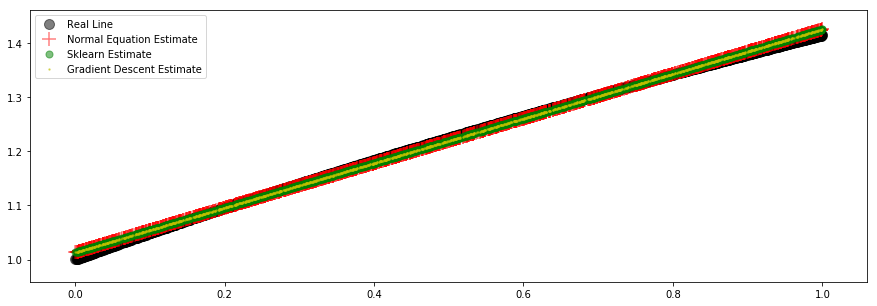

In [243]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, Y_test, color='k', label='Real Line', s=100, alpha=0.5)
plt.scatter(X_test, yHat_normal_test, color='r', label='Normal Equation Estimate', s=200, alpha=0.5, marker='+')
plt.scatter(X_test, yHat_sklrn_test, color='g', label='Sklearn Estimate', s=50, alpha=0.5)
plt.scatter(X_test, yHat_gd_test, color='y', label='Gradient Descent Estimate', s=2, alpha=0.5)
  

plt.legend()
plt.show()

### g) Compare all solutions with the first degree Taylor approximation of the function √ 1 + x.

In [251]:
# let's take the aprroximations near the point 0.5 
T1 = np.sqrt(1+0.5) + 1/(2 * np.sqrt(1+0.5)) * (X_test-0.5)
T1[:5]

array([[1.17315895],
       [1.15653152],
       [1.09253526],
       [1.26853631],
       [1.21520172]])

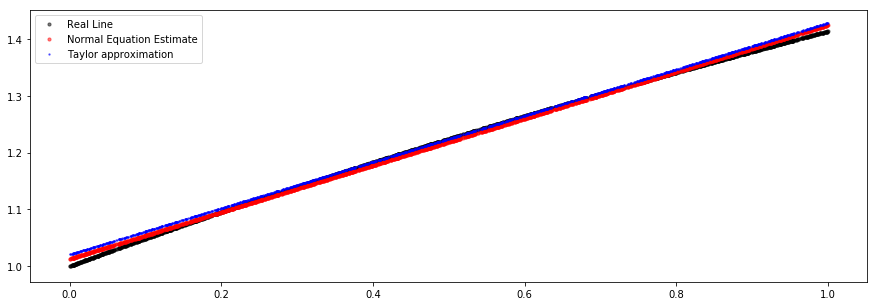

In [256]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, Y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, yHat_normal_test, color='r', label='Normal Equation Estimate', s=10, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
  

plt.legend()
plt.show()

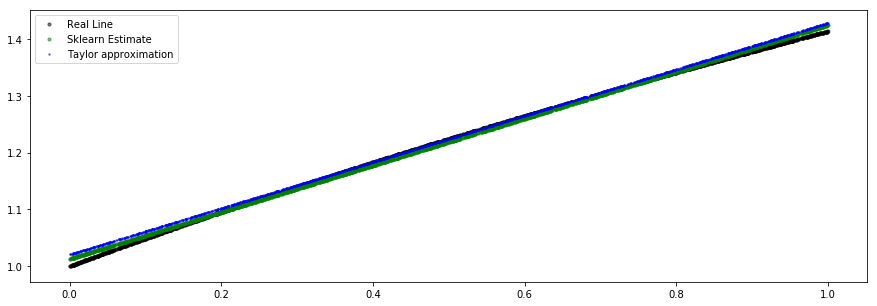

In [258]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, Y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, yHat_sklrn_test, color='g', label='Sklearn Estimate', s=10, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
  

plt.legend()
plt.show()

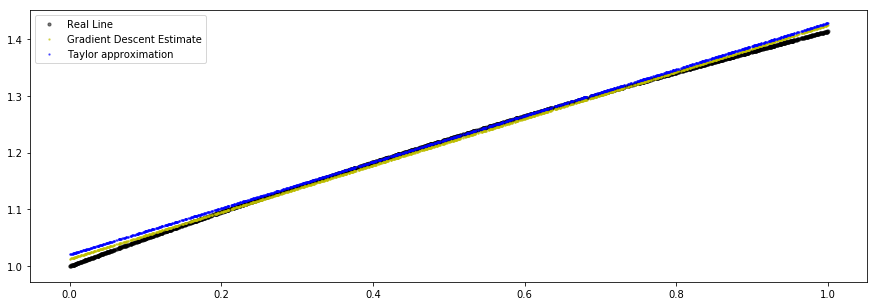

In [259]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, Y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, yHat_gd_test, color='y', label='Gradient Descent Estimate', s=2, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
  

plt.legend()
plt.show()

In [ ]:
# so Taylors first degree approximation gives worse result compared with the other methods.
# all methods' results besides Taylors are nearly equal.